ライブラリの呼び出し

In [1]:
import sys
import os

# 現在の作業ディレクトリを基にプロジェクトのルートディレクトリを設定
project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..','..','..'))
sys.path.append(project_root)
print(project_root)

c:\Users\keisu\Desktop\研究元ファイル\abnormal\research_abnormal


In [2]:
#必要ライブラリのインストール
from src import data
from src import model_basic_single_node
from src.model import model_search_single_node
import config

In [3]:
#モジュールの再リロード
import importlib
import src
import src.data
import src.model_basic_single_node

importlib.reload(src.data)
importlib.reload(src.model_basic_single_node)

<module 'src.model_basic_single_node' from 'c:\\Users\\keisu\\Desktop\\研究元ファイル\\abnormal\\research_abnormal\\src\\model_basic_single_node.py'>

データの読み込み

In [4]:
#データの読み込み及び加工、コラムリストの取得
data_ex, data_original = data.data_complete()

キャッシュファイルからデータを読み込みます


ハイパーパラメータの設定

In [5]:
#ハイパーパラメータの設定

#最大エポック数
max_epochs = 100000

#ノード数
units = 11

#モデル決定の閾値（再構成誤差のパラメータ）
#この閾値を下回ることで十分な性能を持つモデルとする
#今回は使用しない
error_threshold = 0.001

# シード値の準備
seeds = [50,51,52,53]

# ユニット数の準備
unit13 = 10
unit2 = 10

# 学習バッチサイズ
batch_size=64

# 監視するエポック数
patience = 1000

# 学習変化の閾値
min_delta = 1e-10

# 何期間連続して予測を行うか
num = 1

#　初期化回数
num_retry = 4

#　詳細な出力
detail_log = 0

#学習率
learning_rate = 1e-3

#トレーニング開始日
train_start = "2016/6/01 00:00:00"

params = {"max_epochs":max_epochs, "units":units,
	"error_threshold":error_threshold, "seeds":seeds, "unit13": unit13, "unit2" : unit2, 
	"batch_size":batch_size, "patience":patience, "min_delta": min_delta, "num":num, "train_start" : train_start,
    "num_retry": num_retry, "detail_log":detail_log, "learning_rate":learning_rate}

In [6]:
#実験の実行及び結果の格納
abnormal_scores, thresholds,  reconstraction_train_per_features, reconstraction_test_per_features, thresholds_per_features = model_search_single_node.result(data_ex , params)

1回目の期間のモデル
該当期間の確認
はじまり(train)2016/6/01 00:00:00
終わり(train)2018/6/01 00:00:00
はじまり(test)2018/6/01 00:00:00
終わり(test)2018/7/01 00:00:00
1回目の期間のモデル作成開始
1回目の期間のトレーニングデータ数:17161
-----------------------------------------------------------------------------------------
探索中: units_1_3=10, units_2=10, 試行回数=1, seed値 = 50


c:\Users\keisu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


モデルは最大エポック数まで収束条件に達しませんでした。収束条件を満たさず終了しました。
トレーニングデータの再構成誤差：0.005994970119004467
モデルの更新: シード値=50
-----------------------------------------------------------------------------------------
探索中: units_1_3=10, units_2=10, 試行回数=2, seed値 = 51
モデルは最大エポック数まで収束条件に達しませんでした。収束条件を満たさず終了しました。
トレーニングデータの再構成誤差：0.005887818325310045
モデルの更新: シード値=51
-----------------------------------------------------------------------------------------
探索中: units_1_3=10, units_2=10, 試行回数=3, seed値 = 52
モデルは最大エポック数まで収束条件に達しませんでした。収束条件を満たさず終了しました。
トレーニングデータの再構成誤差：0.008806242493054502
-----------------------------------------------------------------------------------------
探索中: units_1_3=10, units_2=10, 試行回数=4, seed値 = 53
モデルは最大エポック数まで収束条件に達しませんでした。収束条件を満たさず終了しました。
トレーニングデータの再構成誤差：0.006153539367347853
結果: units_1_3=10, units_2=10,この時の再構成誤差：0.005887818325310045
1回目の期間のモデル作成終了
537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step
最も再構成誤差が大きかったインデックス番号：17149
-------------------------------------

c:\Users\keisu\Desktop\研究元ファイル\abnormal\research_abnormal\src\model\model_search_single_node.py:136: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  abnormal_scores = pd.concat([abnormal_scores,abnormal_score_df])


In [20]:
print(abnormal_scores)

         measurement_date  anomaly_score
21587 2018-07-01 01:00:03       0.227056
21588 2018-07-01 02:00:02       0.234221
21589 2018-07-01 03:00:03       0.217600
21590 2018-07-01 04:00:02       0.202181
21591 2018-07-01 05:00:03       0.278562
...                   ...            ...
22275 2018-07-31 19:00:03       0.173045
22276 2018-07-31 20:00:02       0.196016
22277 2018-07-31 21:00:02       0.170519
22278 2018-07-31 22:00:02       0.205506
22279 2018-07-31 23:00:03       0.254515

[693 rows x 2 columns]


In [21]:
print(abnormal_scores)

         measurement_date  anomaly_score
21587 2018-07-01 01:00:03       0.227056
21588 2018-07-01 02:00:02       0.234221
21589 2018-07-01 03:00:03       0.217600
21590 2018-07-01 04:00:02       0.202181
21591 2018-07-01 05:00:03       0.278562
...                   ...            ...
22275 2018-07-31 19:00:03       0.173045
22276 2018-07-31 20:00:02       0.196016
22277 2018-07-31 21:00:02       0.170519
22278 2018-07-31 22:00:02       0.205506
22279 2018-07-31 23:00:03       0.254515

[693 rows x 2 columns]


In [25]:
print(thresholds)

{'test_start': '2018/7/01 00:00:00', 'test_end': '2018/8/01 00:00:00', 'threshold_data': 0.422622224975241}


In [ ]:
print(learning_epochs_per_features_array)

In [ ]:
print(reconstraction_train_per_features)

In [ ]:
print(reconstraction_test_per_features)

In [ ]:
print(thresholds_per_features)

In [ ]:
plot.plot_error_train(errors_train)

In [90]:
#結果の抜き出し
#結果のデータを保存しているのではなくモデルを保存している

c:\Users\keisu\Desktop\研究元ファイル\abnormal\research_abnormal\src\plot.py:54: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


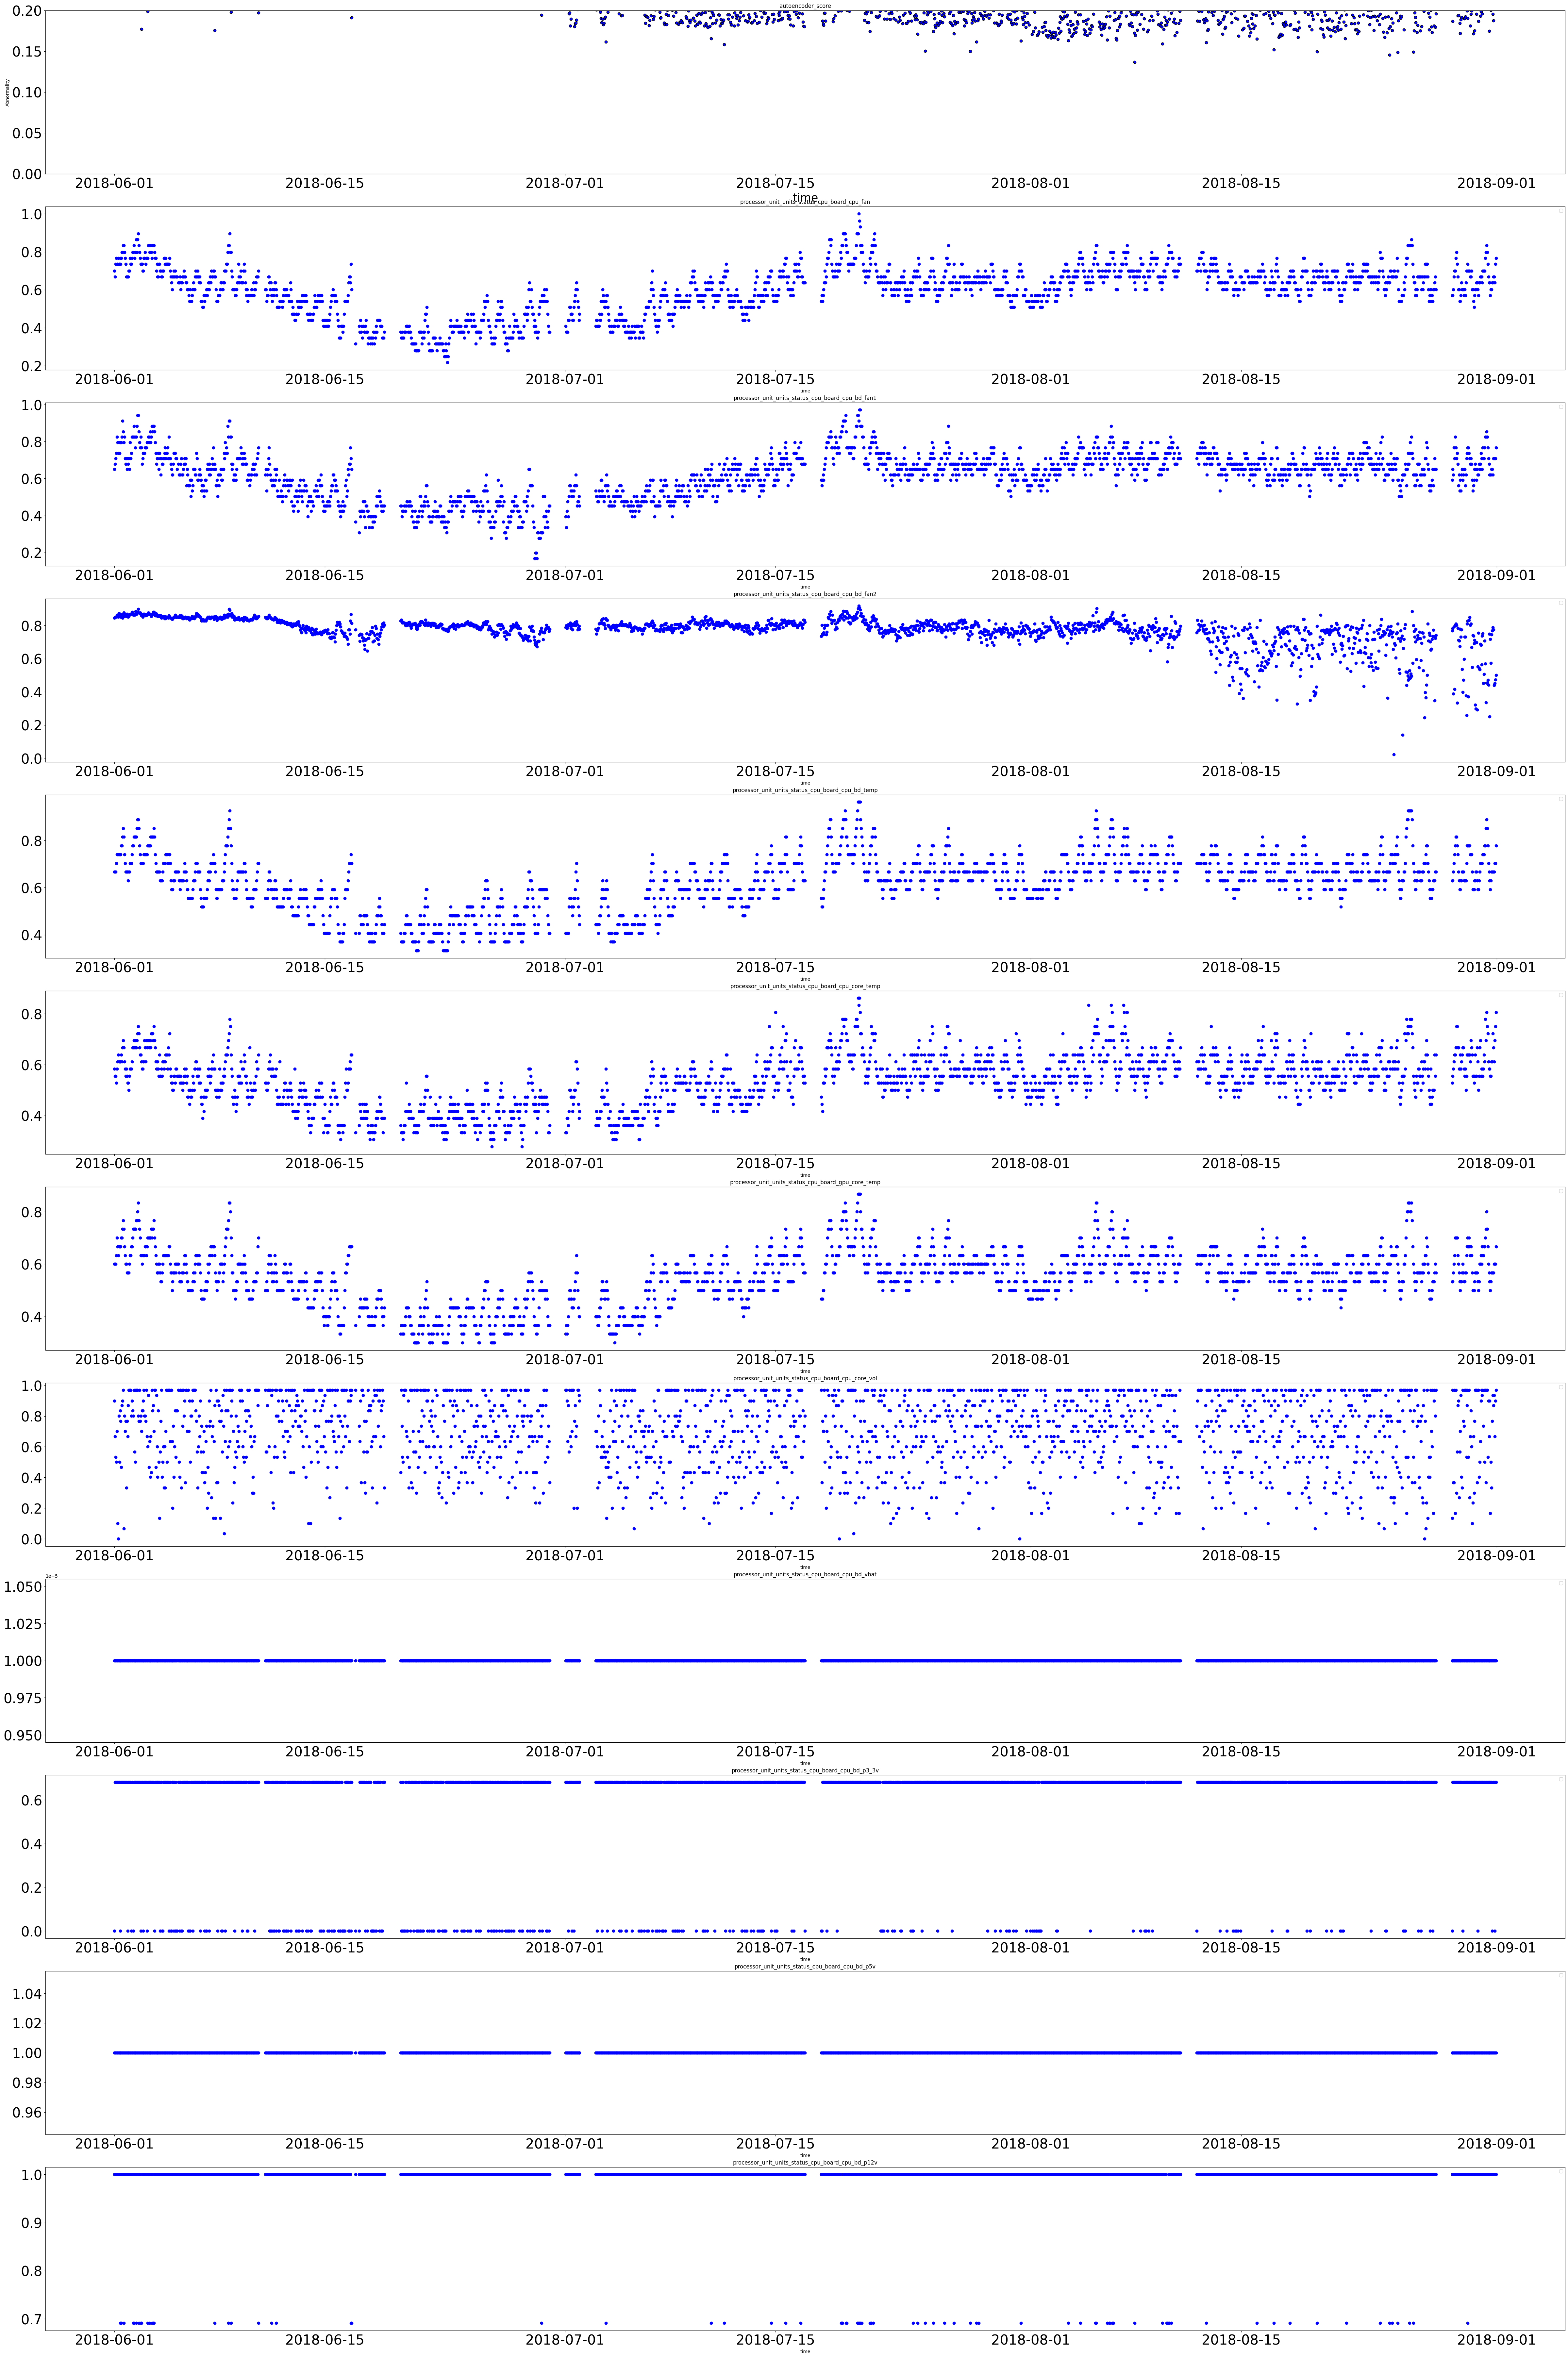

In [11]:
#結果のプロット
plot.plot_all(abnormal_scores,thresholds, config.columns_list, data_original)

(2037, 2)
(19198, 12)


c:\Users\小山佳祐\Desktop\研究元ファイル\abnormal\research_abnormal - コピー\src\plot.py:82: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


KeyError: 'processor_unit_units_status_cpu_board_cpu_fan'

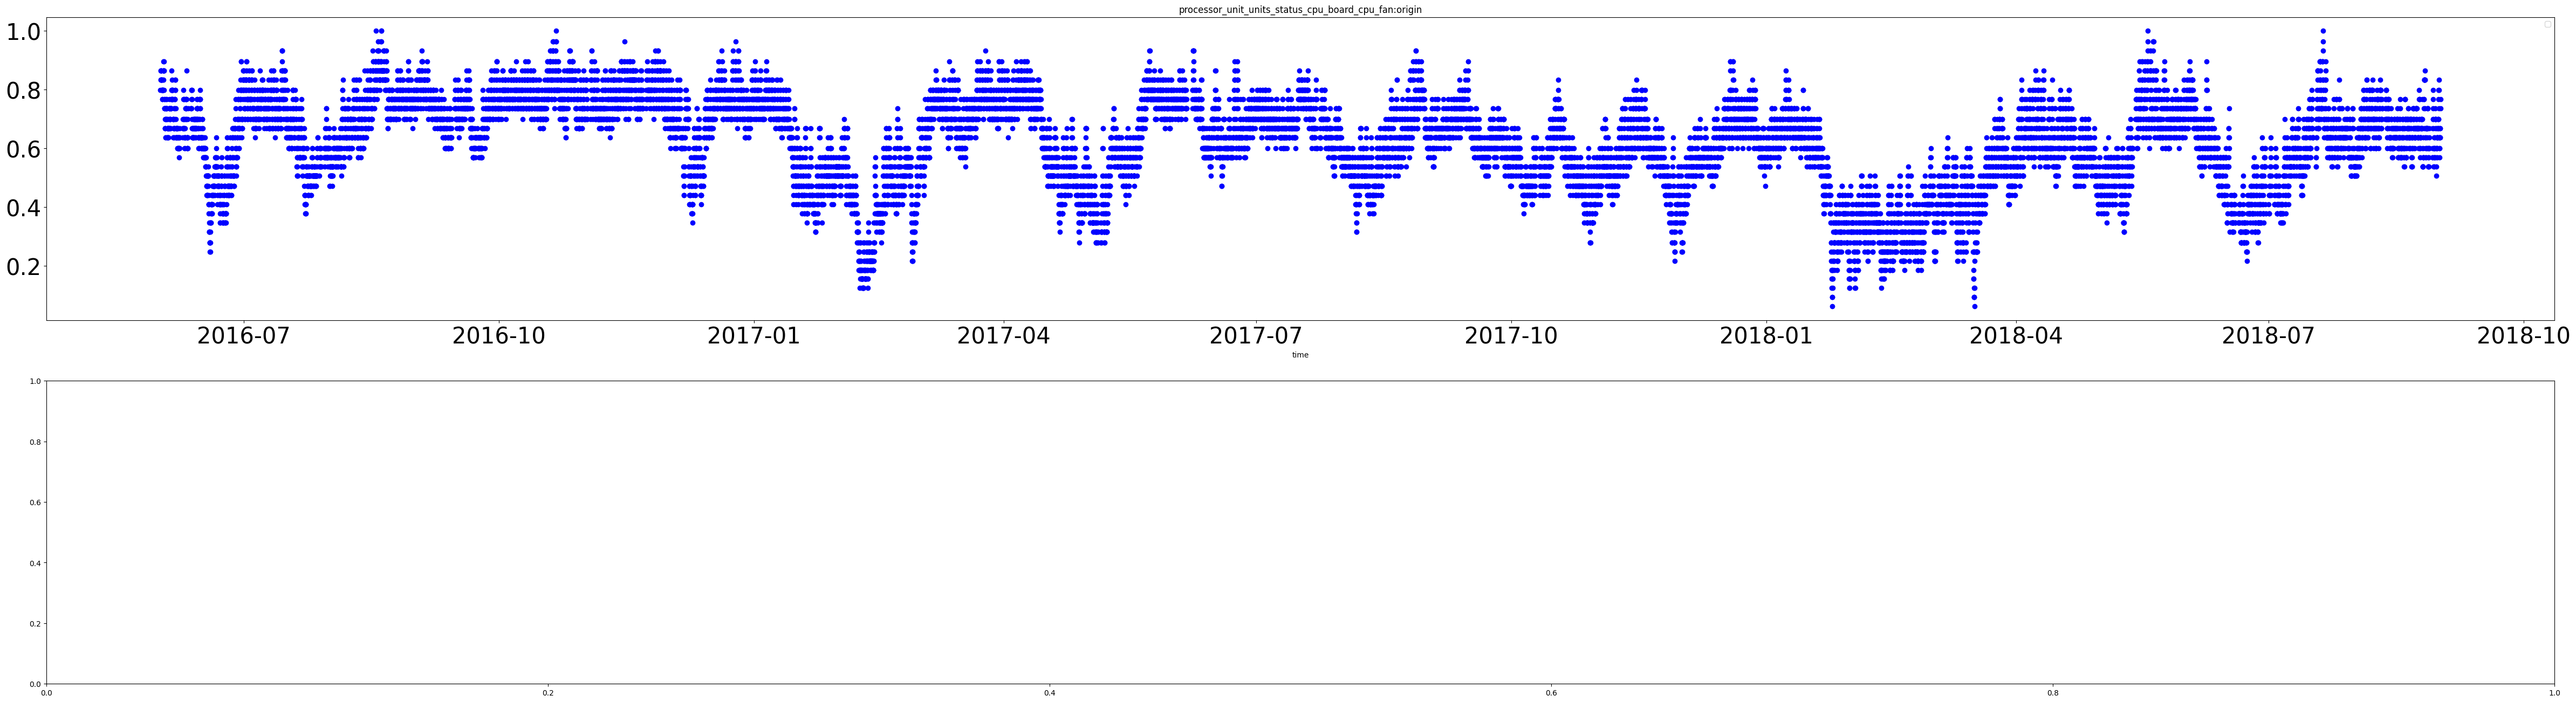

In [100]:
plot.plot_predict(abnormal_scores, config.columns_list, data_ex)

In [38]:
#収束の確認
plot.plot_final_loss_vs_unit_sum(loss_values)

NameError: name 'loss_values' is not defined

In [23]:
#モジュールの再リロード
import importlib
import src
import src.model
import src.model_basic

importlib.reload(src.model)
importlib.reload(src.data)
importlib.reload(src.model_basic)
importlib.reload(src.model.model_check_features)
importlib.reload(src.plot)
from src import data
from src import model_basic
from src import store
from src import plot
from src.model import model_check_features

#必要ライブラリのインストール
from src import *


AttributeError: module 'src.model' has no attribute 'model_check_features'